In [18]:
import gbspy as g
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py

import multiprocessing as mp
from matplotlib.animation import FuncAnimation
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
import matplotlib.lines as mlines
from matplotlib.ticker import AutoMinorLocator
import matplotlib.cm as cm

#import sys  
#sys.path.insert(0, '/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/gbs_python/gbspy')

# Get the current working directory|
cwd = os.getcwd()


# DN tria delta scan
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/nu_scan/DPT_nu1')
#os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DPT_d0p6')
#os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/delta_scan/DNT_dn0p3')
#os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_neutrals/DN_neu')

#os.chdir('/marconi/home/userexternal/klim0000/scratch/GBS/DN_tria/st_scan/DPT_st0p05')

# St scan
#os.chdir('/marconi/home/userexternal/klim0000/scratch/GBS/DN_tria/st_scan/DNT_st0p05')
#os.chdir('/marconi/home/userexternal/klim0000/scratch/GBS/DN_tria/st_scan/DNT_st0p3')


# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Current working directory: /marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/delta_scan/DNT_dn0p3


In [19]:
t2= s.time[-1]
t1= s.time[0]

# Entire torus
z1 = s.z[0]
z2 = s.z[-1]
iz = s.find_ind(z2, s.z)
bsign = s.attribute["B0sign"]

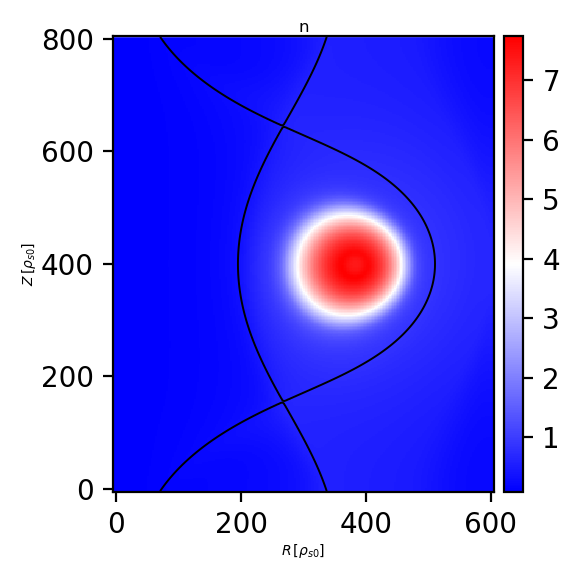

In [20]:
# Retrieve field data for 'n' and compute average
data_n = s.get_field('Te', z1=z1, z2=z2, t1=t1, t2=t2)
avg_data_n = np.mean(data_n, axis=(2, 3))

# Create the meshgrid for plotting
X, Y = np.meshgrid(s.x, s.y)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(3, 3), dpi=200)

# Function to add colorbar
def add_colorbar(im, ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size='5%', pad=0.05)
    plt.colorbar(im, cax=cax)

# Plotting the field 'n'
im = ax.pcolormesh(X, Y, avg_data_n, cmap='bwr')
ax.set_title('n', fontsize=6, pad=1.5)
add_colorbar(im, ax)
ax.contour(X, Y, s.Psi, levels=[s.Psi[s.iyxpt, s.ixxpt]], linewidths=0.7, colors='k')

# Setting labels
ax.set_xlabel(r'$R \,[\rho_{s0}]$', fontsize=5, labelpad=1)
ax.set_ylabel(r'$Z\, [\rho_{s0}]$', fontsize=5, rotation=90, labelpad=1)
# Adjust layout and display the plot
plt.tight_layout()
plt.show(block=False)


In [21]:
print(desired_times)
print(time_indices)


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91.]
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910]


IndexError: index 640 is out of bounds for axis 3 with size 634

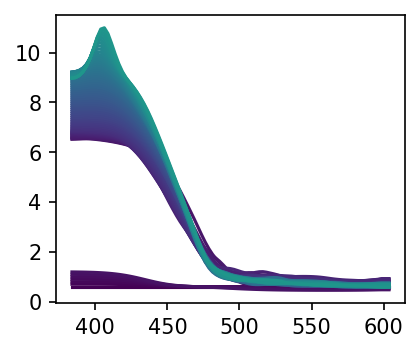

In [22]:
# Desired time points to plot, starting from 98 and incrementing by 3
start_time = t1
end_time = t2  # The last time value in s.time
time_step = 1
dt_plot = time_step * 10 # data is measued every 0.1s

desired_times = np.arange(start_time, end_time, time_step)

# Find the indices in s.time that are closest to the desired times
time_indices = [np.argmin(np.abs(s.time - time)) for time in desired_times]
index_x0 = np.argmin(np.abs(s.x - s.x0))

# Number of plots
num_plots = len(desired_times)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(3, 2.5), dpi=150)

# Generate a list of colors to use for each selected time step
colors = cm.viridis(np.linspace(0, 1, num_plots))

# Plot the cross-section for the selected time steps
for i, time_idx in enumerate(time_indices):
    # Extract the cross-section at s.ny//2 for the selected time index
    #cross_section = np.mean(data_n[s.ny // 2, index_x0:s.nx, :, i*dt_plot], axis=1)
    cross_section = np.mean(data_n[s.ny // 2, index_x0:s.nx, :, i*dt_plot], axis=1)
    # Create an x-axis range for the sliced data
    x = np.linspace(s.x[index_x0], s.x[s.nx-1], cross_section.shape[0])
    # Plot with a different color for each selected time step
    ax.plot(x, cross_section, color=colors[i], label=f'Time: {s.time[time_idx]:.2f}')


# Set labels and title
ax.set_xlabel('R')  # Replace with your actual label
ax.set_ylabel('Values at ny/2')  # Replace with your actual label
ax.set_title('Time Evolution of density', size=8)

# Add legend outside the loop
# Here we handle the legend such that it only shows unique entries
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # This removes duplicates

# Add legend outside the plot, on the right side
ax.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

# Adjust the layout to make room for the legend
#plt.tight_layout()

# Show the plot
plt.show()


In [30]:
np.shape(data_n)

(324, 244, 80, 634)

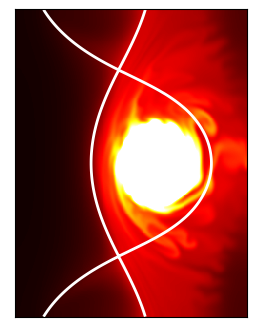

In [61]:
# Create the meshgrid for plotting
X, Y = np.meshgrid(s.x, s.y)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(3, 4), dpi=100)

# Function to add colorbar
def add_colorbar(im, ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size='5%', pad=0.05)
    plt.colorbar(im, cax=cax)

# Plotting the field 'n'
im = ax.pcolormesh(X, Y, data_n[:,:,-1,-1], vmin=0, vmax=2, cmap='hot')
#ax.set_title('n', fontsize=6, pad=1.5)
#add_colorbar(im, ax)
ax.contour(X, Y, s.Psi, levels=[s.Psi[s.iyxpt, s.ixxpt]], linewidths=2, colors='w')

# Setting labels
#ax.set_xlabel(r'$R \,[\rho_{s0}]$')
#ax.set_ylabel(r'$Z\, [\rho_{s0}]$')
# Adjust layout and display the plot
#plt.tight_layout()
ax.set_xticks([])
ax.set_yticks([])

plt.show(block=False)
